Authors: [Maxime Devanne](https://maxime-devanne.com), [Germain Forestier](https://germain-forestier.info/), [Hassan Ismail Fawaz](https://hfawaz.github.io) and [Jonathan Weber](http://jonathan-weber.eu/)

# Recurrent Neural Networks - practical work

This is a basic code sample in order to load ans visualize skeleton sequences from MSR Action 3D Dataset.

More information about the dataset can be found [here](https://sites.google.com/view/wanqingli/data-sets/msr-action3d) 

Dataset can be downloaded from here:


*   Skeleton data (X): https://maxime-devanne.com/datasets/MSRAction3D/X.npy
*   Action labels (Y): https://maxime-devanne.com/datasets/MSRAction3D/Y.npy
*   Subject labels (Y_s): https://maxime-devanne.com/datasets/MSRAction3D/Y_s.npy



## Importing the librairies

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing, metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import signal
import os
import imageio
from IPython.display import Image

## Loading and observing the data

### Loading data

In [2]:
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/X.npy
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/Y.npy
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/Y_s.npy
x = np.load('X.npy')
y = np.load('Y.npy')
y_s = np.load('Y_s.npy')
print(x.shape,y.shape, y_s.shape)

--2021-11-29 06:23:24--  https://maxime-devanne.com/datasets/MSRAction3D/X.npy
Resolving maxime-devanne.com (maxime-devanne.com)... 213.186.33.4, 2001:41d0:1:1b00:213:186:33:4
Connecting to maxime-devanne.com (maxime-devanne.com)|213.186.33.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10342208 (9.9M)
Saving to: ‘X.npy’

X.npy               100%[===================>]   9.86M  9.13MB/s    in 1.1s    

2021-11-29 06:23:26 (9.13 MB/s) - ‘X.npy’ saved [10342208/10342208]

--2021-11-29 06:23:26--  https://maxime-devanne.com/datasets/MSRAction3D/Y.npy
Resolving maxime-devanne.com (maxime-devanne.com)... 213.186.33.4, 2001:41d0:1:1b00:213:186:33:4
Connecting to maxime-devanne.com (maxime-devanne.com)|213.186.33.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4664 (4.6K)
Saving to: ‘Y.npy’

Y.npy               100%[===================>]   4.55K  --.-KB/s    in 0s      

2021-11-29 06:23:26 (438 MB/s) - ‘Y.npy’ saved [4664/4664]

--2021-

### Visualization functions

In [3]:
# function to create a new directory
def create_directory(directory_path):
    if os.path.exists(directory_path):
        return None
    else:
        try:
            os.makedirs(directory_path)
        except:
            # in case another machine created the path meanwhile !:(
            return None
        return directory_path

# function to plot limbs according to Kinect V1 skeleton
# parmas: Axes3D ax, X coordinates jointsX, Y coordinates jointsY, Z coordinates jointsZ 
def plot_limbs(ax, jointsX, jointsY, jointsZ):
    indexes = [19, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [0, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [1, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [0, 7]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [7, 9]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [9, 11]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [1, 8]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [8, 10]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [10, 12]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [2, 3]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [3, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [4, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [5, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [4, 13]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [13, 15]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [15, 17]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [5, 14]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [14, 16]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [16, 18]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')


# function to show the sequence (in fact it saves all frames as images and then create a gif of the animation)
def plot_skel(x, idx_to_plot):
    seq = x[idx_to_plot]
    out_root_dir = 'out_/'
    out_pngs_dir = out_root_dir + 'pngs/' + str(idx_to_plot) + '/'
    out_gifs_dir = out_root_dir + 'gifs/'
    create_directory(out_pngs_dir)
    create_directory(out_gifs_dir)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=23., azim=-110)
    file_names = []
    numJoints=20
    dim=3
    for i in range(0, seq.shape[0]):
        plt.cla()
        skelX = seq[i].reshape(numJoints, dim)[:, 0]
        skelY = seq[i].reshape(numJoints, dim)[:, 2]
        skelZ = seq[i].reshape(numJoints, dim)[:, 1]
        # plot joints
        ax.scatter(skelX, skelY, skelZ, c='green', depthshade=False)
        # plot limbs
        plot_limbs(ax, skelX, skelY, skelZ)
        # axes limits may have to be modified according to data (for betetr visualization)
        ax.set_xlim(-2, 2)
        ax.set_zlim(-1, 1)
        ax.set_ylim(0, 5)
        curr_file_name = str(i) + '.png'
        file_names.append(curr_file_name)
        plt.savefig(out_pngs_dir + curr_file_name)
    plt.close()
    # create the gif
    images = []
    for file_name in file_names:
        images.append(imageio.imread(out_pngs_dir + file_name))

    out_file = out_gifs_dir + str(idx_to_plot) + '.gif'
    kargs = {'duration': 0.1}
    imageio.mimsave(out_file, images, 'GIF', **kargs)

### Skeleton sequence visualization
Each frame of the sequence is saved as a .png and then an animated Gif is created

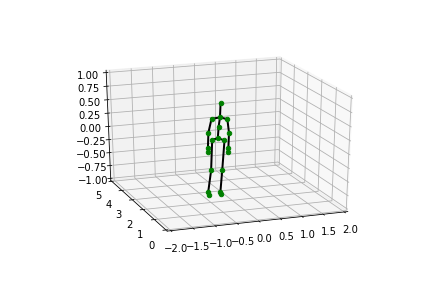

In [4]:
# plot a sequence
id_to_plot = 1
plot_skel(x, id_to_plot)
Image(open('out_/gifs/' + str(id_to_plot) + '.gif','rb').read())

### Functions to normalize skeleton sequences

In [5]:
def normalizeSkelSeq(seq):
    n_seq=seq
    min_x=np.amin(n_seq[:,:,0::3])
    min_y=np.amin(n_seq[:,:,1::3])
    min_z=np.amin(n_seq[:,:,2::3])
    max_x=np.amax(n_seq[:,:,0::3])
    max_y=np.amax(n_seq[:,:,1::3])
    max_z=np.amax(n_seq[:,:,2::3])
    n_seq[:,:,0::3]=2*((n_seq[:,:,0::3]-min_x)/(max_x-min_x))-1
    n_seq[:,:,1::3]=2*((n_seq[:,:,1::3]-min_y)/(max_y-min_y))-1
    n_seq[:,:,2::3]=2*((n_seq[:,:,2::3]-min_z)/(max_z-min_z))-1
    return n_seq

# PW

In [6]:
n_class = np.unique(y).shape[0]
print('#classes:', n_class)

# data normalization
x = normalizeSkelSeq(x)

#classes: 20


In [7]:
def transform_labels(labels):
  enc = preprocessing.LabelEncoder()
  labels_new = enc.fit_transform(labels.reshape(-1,1))

  enc = preprocessing.OneHotEncoder()
  return enc.fit_transform(labels_new.reshape(-1,1)).toarray()

In [8]:
y_bin = transform_labels(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Data Preparation

In [9]:
x_train, y_train = np.array([x_ for x_, label in zip(x, y_s) if label<6]), np.array([label for label, id_ in zip(y_bin, y_s) if id_<6])
x_val, y_val = np.array([x_ for x_, label in zip(x, y_s) if label==6 or label==7]), np.array([label for label, id_ in zip(y_bin, y_s) if id_==6 or id_==7])
x_test, y_test = np.array([x_ for x_, label in zip(x, y_s) if label>7]), np.array([label for label, id_ in zip(y_bin, y_s) if id_>7])

print('Train shapes:', x_train.shape, y_train.shape)
print('Validation shapes:', x_val.shape, y_val.shape)
print('Test shapes:', x_test.shape, y_test.shape)

Train shapes: (270, 38, 60) (270, 20)
Validation shapes: (117, 38, 60) (117, 20)
Test shapes: (180, 38, 60) (180, 20)


## Building LSTM

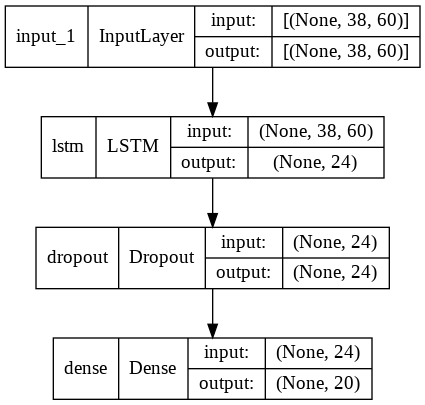

In [10]:
inputs = keras.layers.Input((x.shape[1:]))
lstm = keras.layers.LSTM(24)(inputs)
dropout = keras.layers.Dropout(rate=0.5)(lstm)
outputs = keras.layers.Dense(n_class, activation='softmax')(dropout)

model = keras.models.Model(inputs=inputs, outputs=outputs, name='lstm')
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

In [11]:
hist = model.fit(x_train, y_train, 
                 batch_size=256, epochs=2000, 
                 validation_data=(x_val, y_val), 
                 callbacks=[keras.callbacks.EarlyStopping(patience=100)])

Epoch 1/2000
2/2 [==============================] - 3s 578ms/step - loss: 3.0480 - accuracy: 0.0407 - val_loss: 3.0107 - val_accuracy: 0.0513
Epoch 2/2000
2/2 [==============================] - 0s 43ms/step - loss: 3.0311 - accuracy: 0.0519 - val_loss: 3.0076 - val_accuracy: 0.0427
Epoch 3/2000
2/2 [==============================] - 0s 48ms/step - loss: 2.9957 - accuracy: 0.0704 - val_loss: 3.0061 - val_accuracy: 0.0513
Epoch 4/2000
2/2 [==============================] - 0s 44ms/step - loss: 3.0014 - accuracy: 0.0333 - val_loss: 3.0049 - val_accuracy: 0.0427
Epoch 5/2000
2/2 [==============================] - 0s 44ms/step - loss: 3.0032 - accuracy: 0.0444 - val_loss: 3.0039 - val_accuracy: 0.0513
Epoch 6/2000
2/2 [==============================] - 0s 44ms/step - loss: 2.9909 - accuracy: 0.0370 - val_loss: 3.0031 - val_accuracy: 0.0513
Epoch 7/2000
2/2 [==============================] - 0s 43ms/step - loss: 2.9918 - accuracy: 0.0704 - val_loss: 3.0020 - val_accuracy: 0.0513
Epoch 8/2000

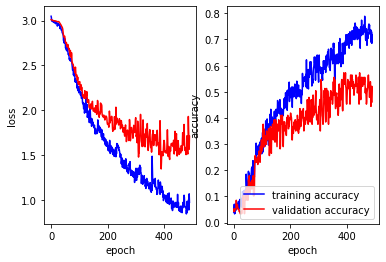

In [12]:
plt.subplot(121)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], c='blue', label='training loss')
plt.plot(hist.history['val_loss'], c='red', label='validation loss')

plt.subplot(122)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], c='blue', label='training accuracy')
plt.plot(hist.history['val_accuracy'], c='red', label='validation accuracy')
plt.legend();

In [13]:
loss, acc = model.evaluate(x_test, y_test)
print(f'loss: {loss}\nacc: {acc}')

6/6 [==============================] - 0s 5ms/step - loss: 1.8406 - accuracy: 0.4389
loss: 1.84062922000885
acc: 0.43888887763023376


### Building a new model

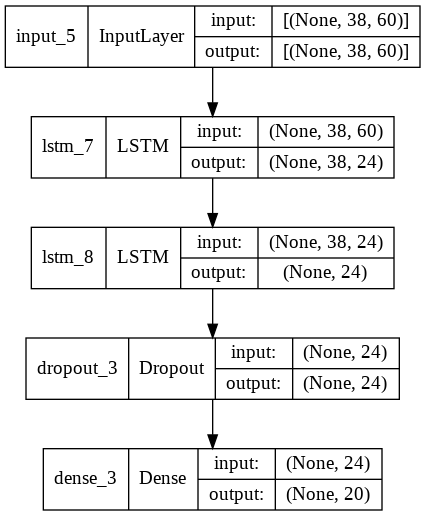

In [50]:
inputs = keras.layers.Input((x.shape[1:]))
lstm_1 = keras.layers.LSTM(24, return_sequences=True)(inputs)
lstm_2 = keras.layers.LSTM(24)(lstm_1)
dropout = keras.layers.Dropout(rate=0.5)(lstm_2)
outputs = keras.layers.Dense(n_class, activation='softmax')(dropout)

model = keras.models.Model(inputs=inputs, outputs=outputs, name='lstm')
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

In [51]:
hist = model.fit(x_train, y_train, 
                 batch_size=256, epochs=2000, 
                 validation_data=(x_val, y_val), 
                 callbacks=[keras.callbacks.EarlyStopping(patience=100)])

Epoch 1/2000
2/2 [==============================] - 4s 937ms/step - loss: 3.0243 - accuracy: 0.0556 - val_loss: 3.0018 - val_accuracy: 0.0769
Epoch 2/2000
2/2 [==============================] - 0s 64ms/step - loss: 3.0082 - accuracy: 0.0556 - val_loss: 2.9996 - val_accuracy: 0.0513
Epoch 3/2000
2/2 [==============================] - 0s 63ms/step - loss: 2.9989 - accuracy: 0.0481 - val_loss: 2.9988 - val_accuracy: 0.0513
Epoch 4/2000
2/2 [==============================] - 0s 63ms/step - loss: 2.9997 - accuracy: 0.0593 - val_loss: 2.9981 - val_accuracy: 0.0513
Epoch 5/2000
2/2 [==============================] - 0s 63ms/step - loss: 3.0048 - accuracy: 0.0593 - val_loss: 2.9975 - val_accuracy: 0.0513
Epoch 6/2000
2/2 [==============================] - 0s 67ms/step - loss: 2.9964 - accuracy: 0.0815 - val_loss: 2.9963 - val_accuracy: 0.0513
Epoch 7/2000
2/2 [==============================] - 0s 65ms/step - loss: 2.9823 - accuracy: 0.0593 - val_loss: 2.9946 - val_accuracy: 0.0513
Epoch 8/2000

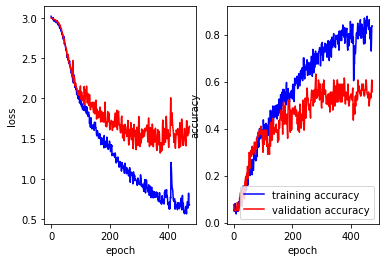

In [52]:
plt.subplot(121)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], c='blue', label='training loss')
plt.plot(hist.history['val_loss'], c='red', label='validation loss')

plt.subplot(122)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], c='blue', label='training accuracy')
plt.plot(hist.history['val_accuracy'], c='red', label='validation accuracy')
plt.legend();

In [54]:
loss, acc = model.evaluate(x_test, y_test)
print(f'loss: {loss}\nacc: {acc}')

6/6 [==============================] - 0s 8ms/step - loss: 1.8030 - accuracy: 0.5222
loss: 1.8029671907424927
acc: 0.5222222208976746


## Visualization

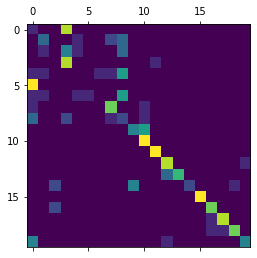

In [55]:
y_pred = model.predict(x_test)
conf_mat = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.matshow(conf_mat);

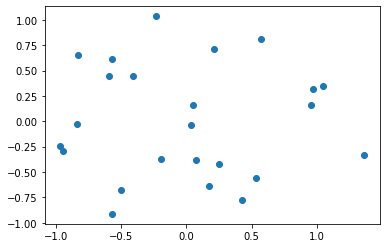

In [71]:
for layer in model.layers:
  if 'LSTM' in str(layer):
    features = layer.weights
iw, huw, _ = features

pca = PCA(n_components=2)
features_transformed = pca.fit_transform(huw)

plt.scatter(features_transformed[:,0], features_transformed[:,1]);

## Bonus

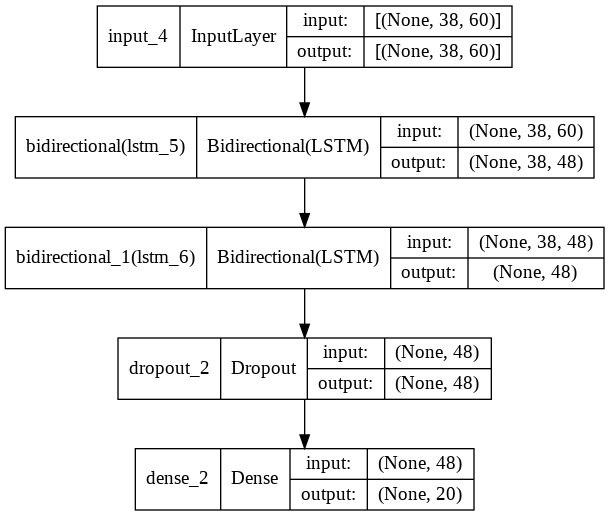

In [45]:
inputs = keras.layers.Input((x.shape[1:]))
lstm_1 = keras.layers.Bidirectional(keras.layers.LSTM(24, return_sequences=True))(inputs)
lstm_2 = keras.layers.Bidirectional(keras.layers.LSTM(24))(lstm_1)
dropout = keras.layers.Dropout(rate=0.5)(lstm_2)
outputs = keras.layers.Dense(n_class, activation='softmax')(dropout)

model = keras.models.Model(inputs=inputs, outputs=outputs, name='lstm')
model.compile(optimizer='adam',
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
keras.utils.plot_model(model, show_shapes=True)

In [46]:
hist = model.fit(x_train, y_train, 
                 batch_size=256, epochs=2000, 
                 validation_data=(x_val, y_val), 
                 callbacks=[keras.callbacks.EarlyStopping(patience=100)])

Epoch 1/2000
2/2 [==============================] - 9s 2s/step - loss: 3.0094 - accuracy: 0.0519 - val_loss: 2.9963 - val_accuracy: 0.0513
Epoch 2/2000
2/2 [==============================] - 0s 101ms/step - loss: 3.0142 - accuracy: 0.0296 - val_loss: 2.9953 - val_accuracy: 0.0513
Epoch 3/2000
2/2 [==============================] - 0s 93ms/step - loss: 3.0189 - accuracy: 0.0333 - val_loss: 2.9944 - val_accuracy: 0.0513
Epoch 4/2000
2/2 [==============================] - 0s 108ms/step - loss: 3.0001 - accuracy: 0.0481 - val_loss: 2.9940 - val_accuracy: 0.0598
Epoch 5/2000
2/2 [==============================] - 0s 92ms/step - loss: 3.0125 - accuracy: 0.0370 - val_loss: 2.9934 - val_accuracy: 0.0684
Epoch 6/2000
2/2 [==============================] - 0s 107ms/step - loss: 2.9992 - accuracy: 0.0667 - val_loss: 2.9927 - val_accuracy: 0.0684
Epoch 7/2000
2/2 [==============================] - 0s 97ms/step - loss: 2.9920 - accuracy: 0.0556 - val_loss: 2.9920 - val_accuracy: 0.0855
Epoch 8/2000

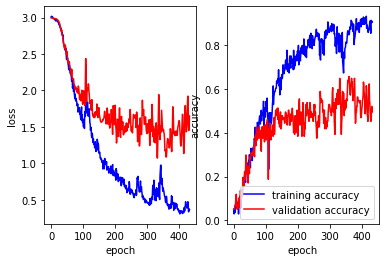

In [47]:
plt.subplot(121)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'], c='blue', label='training loss')
plt.plot(hist.history['val_loss'], c='red', label='validation loss')

plt.subplot(122)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'], c='blue', label='training accuracy')
plt.plot(hist.history['val_accuracy'], c='red', label='validation accuracy')
plt.legend();

In [48]:
loss, acc = model.evaluate(x_test, y_test)
print(f'loss: {loss}\nacc: {acc}')

6/6 [==============================] - 0s 14ms/step - loss: 1.5178 - accuracy: 0.5500
loss: 1.5177948474884033
acc: 0.550000011920929
